# Классификация фруктов

## Подключение библиотек и загрузка данных

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
import seaborn as sb


In [41]:
df: pd.DataFrame = pd.read_excel('./data/Date_Fruit_Datasets.xlsx')


In [42]:
df.head()

,AREA,PERIMETER,MAJORAXIS,MINORAXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECTRATIO,...,kurtosisRR,kurtosisRG,kurtosisRB,entropyRR,entropyRG,entropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


## Анализ данных

Посмотрим количество записей и столбцов

In [43]:
df.shape

(898, 35)

Количество записей небольшое, но при этом имеется большое количество столбцов

Посмотрим типы данных столбцов и их заполненность, возможно что то можно будет удалить или закодировать

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJORAXIS      898 non-null    float64
 3   MINORAXIS      898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECTRATIO    898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  meanRR         898 non-null    float64
 17  meanRG         898 non-null    float64
 18  meanRB    

Пропуска в данных не обнаружено, большинство типов является числовым, единственный объект - целевая переменная

In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AREA,898.0,2.982952e+05,1.072452e+05,1.987000e+03,2.069480e+05,3.198330e+05,3.825730e+05,5.460630e+05
PERIMETER,898.0,2.057661e+03,4.100125e+02,9.118280e+02,1.726091e+03,2.196345e+03,2.389717e+03,2.811997e+03
MAJORAXIS,898.0,7.508120e+02,1.440593e+02,3.367227e+02,6.410686e+02,7.913634e+02,8.586338e+02,1.222723e+03
MINORAXIS,898.0,4.958728e+02,1.142689e+02,2.283200e+00,4.046844e+02,4.950548e+02,5.890317e+02,7.664536e+02
ECCENTRICITY,898.0,7.374678e-01,8.872739e-02,3.448000e-01,6.856250e-01,7.547000e-01,8.021500e-01,1.000000e+00
EQDIASQ,898.0,6.045779e+02,1.195939e+02,5.029840e+01,5.133171e+02,6.381409e+02,6.979305e+02,8.338279e+02
SOLIDITY,898.0,9.818403e-01,1.815742e-02,8.366000e-01,9.788250e-01,9.873000e-01,9.918000e-01,9.974000e-01
CONVEX_AREA,898.0,3.038456e+05,1.088157e+05,2.257000e+03,2.100228e+05,3.272070e+05,3.888040e+05,5.525980e+05
EXTENT,898.0,7.362671e-01,5.374518e-02,5.123000e-01,7.058750e-01,7.469500e-01,7.758500e-01,8.562000e-01
ASPECTRATIO,898.0,2.131102e+00,1.782078e+01,1.065300e+00,1.373725e+00,1.524150e+00,1.674750e+00,5.355257e+02


Посмотрим количество уникальных значений в целевой переменной

In [46]:
len(df.Class.unique())

7

Количество не такое большое, по этому мы может закодировать значение с помощью словаря

In [47]:
df.Class.value_counts()

DOKOL     204
SAFAVI    199
ROTANA    166
DEGLET     98
SOGAY      94
IRAQI      72
BERHI      65
Name: Class, dtype: int64

In [48]:
class_dic = {
   'DOKOL' : 1,
  'SAFAVI': 2,
  'ROTANA': 3,
  'DEGLET': 4,
  'SOGAY': 5,
  'IRAQI': 6,
  'BERHI': 7,
}

In [49]:
df.Class = df.Class.map(class_dic)

In [50]:
df.Class.head()

0    7
1    7
2    7
3    7
4    7
Name: Class, dtype: int64

Посмотрим отношение данных к целевой переменной на heatmap'е

<AxesSubplot:>

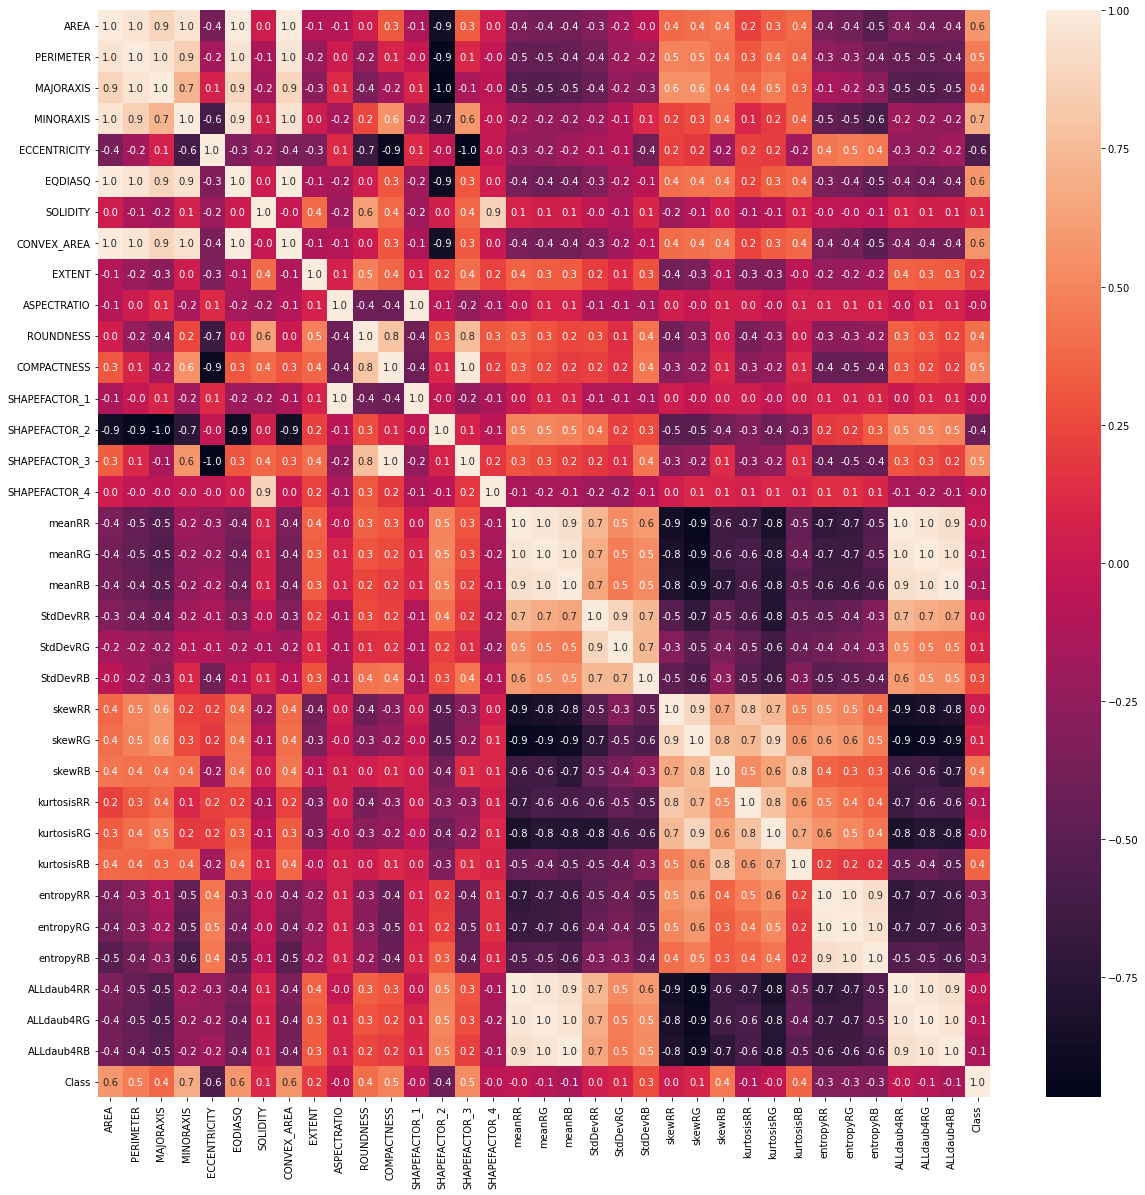

In [51]:
mpl.figure(figsize=(20, 20))
sb.heatmap(df.corr(), annot=True, fmt='.1f')

Удалим столбец ASPECTRATIO, SHAPEFACTOR_4, SHAPEFACTOR_1 и SOLIDITY так как они не вносят заметного влияния на какие либо столбцы

In [52]:
df.drop(columns=['ASPECTRATIO', 'SHAPEFACTOR_4', 'SHAPEFACTOR_1', 'SOLIDITY'], inplace=True)

Посмотрим на график еще раз

<AxesSubplot:>

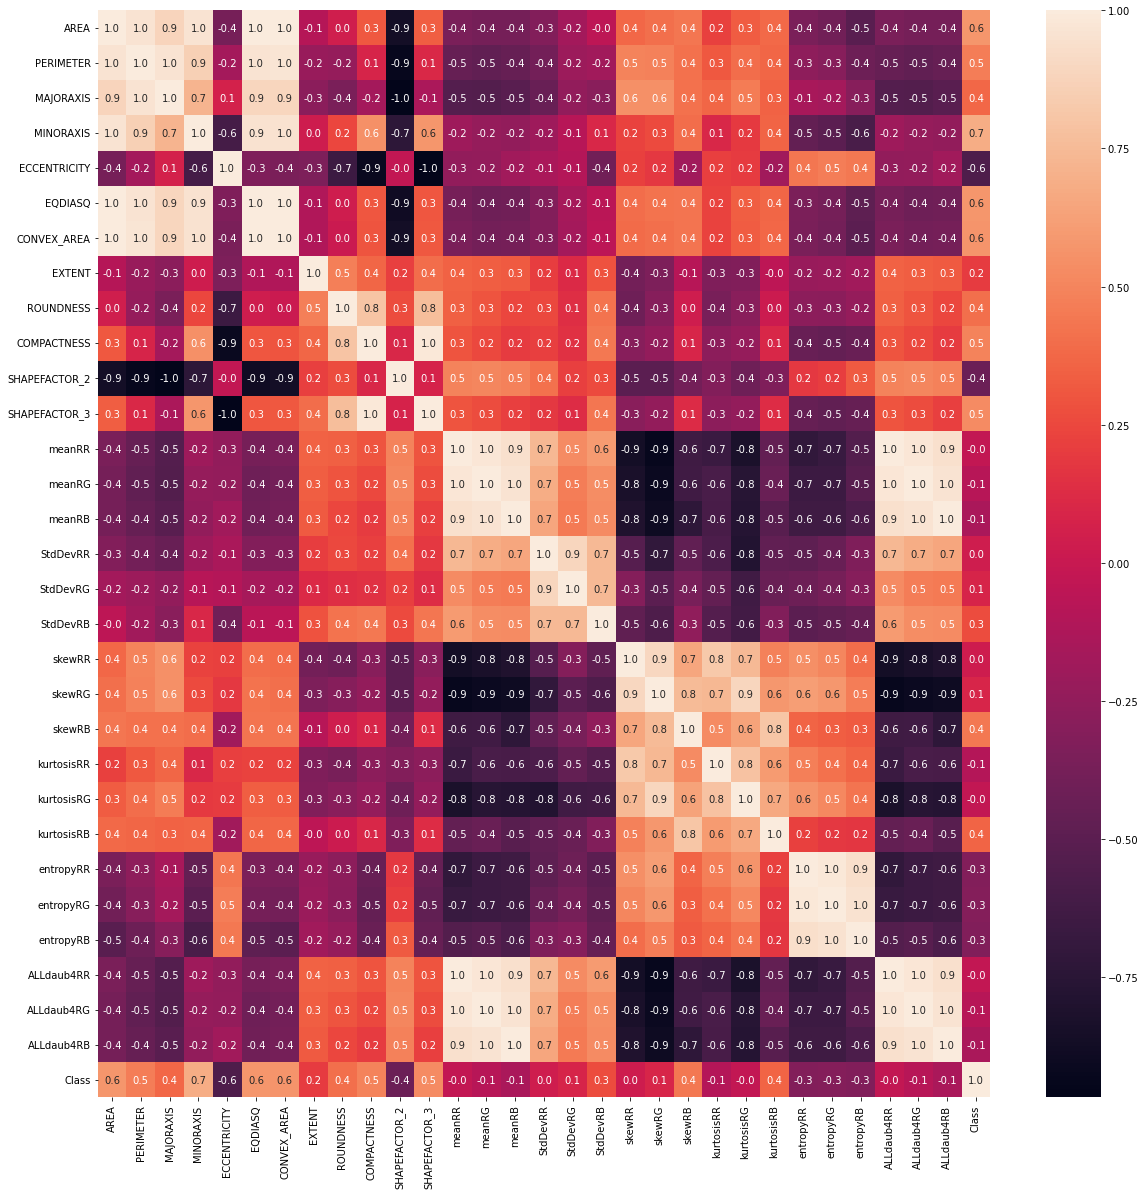

In [53]:
mpl.figure(figsize=(20, 20))
sb.heatmap(df.corr(), annot=True, fmt='.1f')

In [54]:
df.columns

Index(['AREA', 'PERIMETER', 'MAJORAXIS', 'MINORAXIS', 'ECCENTRICITY',
       'EQDIASQ', 'CONVEX_AREA', 'EXTENT', 'ROUNDNESS', 'COMPACTNESS',
       'SHAPEFACTOR_2', 'SHAPEFACTOR_3', 'meanRR', 'meanRG', 'meanRB',
       'StdDevRR', 'StdDevRG', 'StdDevRB', 'skewRR', 'skewRG', 'skewRB',
       'kurtosisRR', 'kurtosisRG', 'kurtosisRB', 'entropyRR', 'entropyRG',
       'entropyRB', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB', 'Class'],
      dtype='object')

В следующем подходе уберем столбцы, которые имею сильную зависимость(больше 0,7 по модулю) от других столбцов

К таким стобцам будут относится 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB', так как они практически линейно зависимы друг от друга и никак не влияют на целевую переменную, а так же зависят практически линейно от  'meanRR', 'meanRG', 'meanRB'

In [55]:
df.drop(columns=['ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB'], inplace=True)

Дальше удалим 'entropyRR', 'entropyRG', и оставим 'entropyRB', так как они линейно зависимы друг от друга, 'entropyRB' имеет большее влияние на другие столбцы

In [56]:
df.drop(columns=['entropyRR', 'entropyRG'], inplace=True)

<AxesSubplot:>

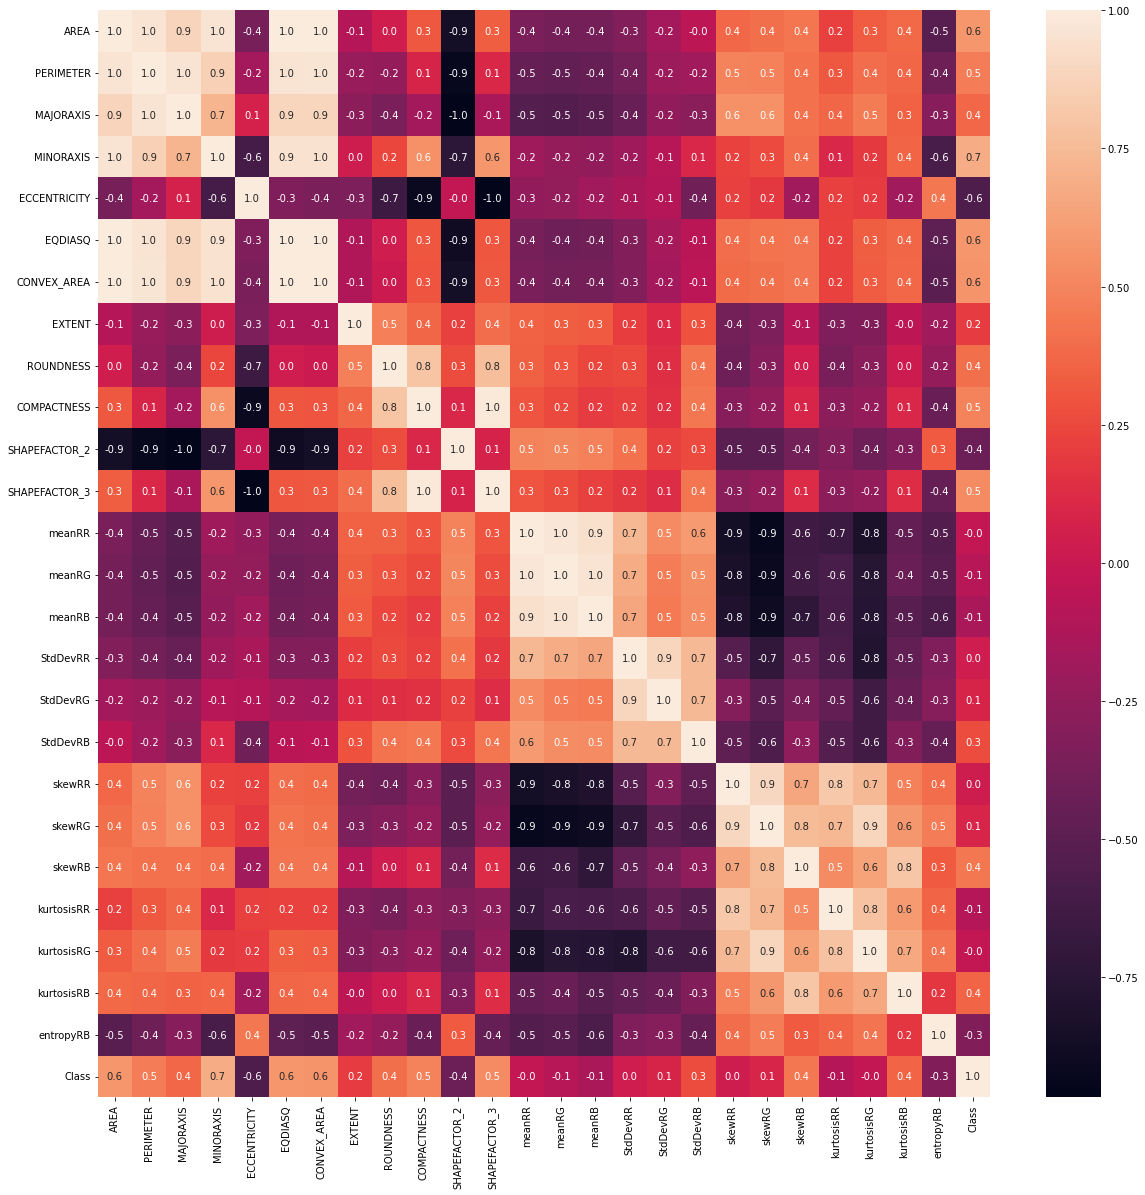

In [57]:
mpl.figure(figsize=(20, 20))
sb.heatmap(df.corr(), annot=True, fmt='.1f')

Удалим 'skewRR', 'skewRG', так как 'skewRB' имеет большее влияние на целевую переменную, а по цепочке зависимостей они подходят под условия

In [58]:
df.drop(columns=['skewRR', 'skewRG'], inplace=True)

Удалим 'COMPACTNESS'

In [59]:
df.drop(columns=['COMPACTNESS'], inplace=True)

<AxesSubplot:>

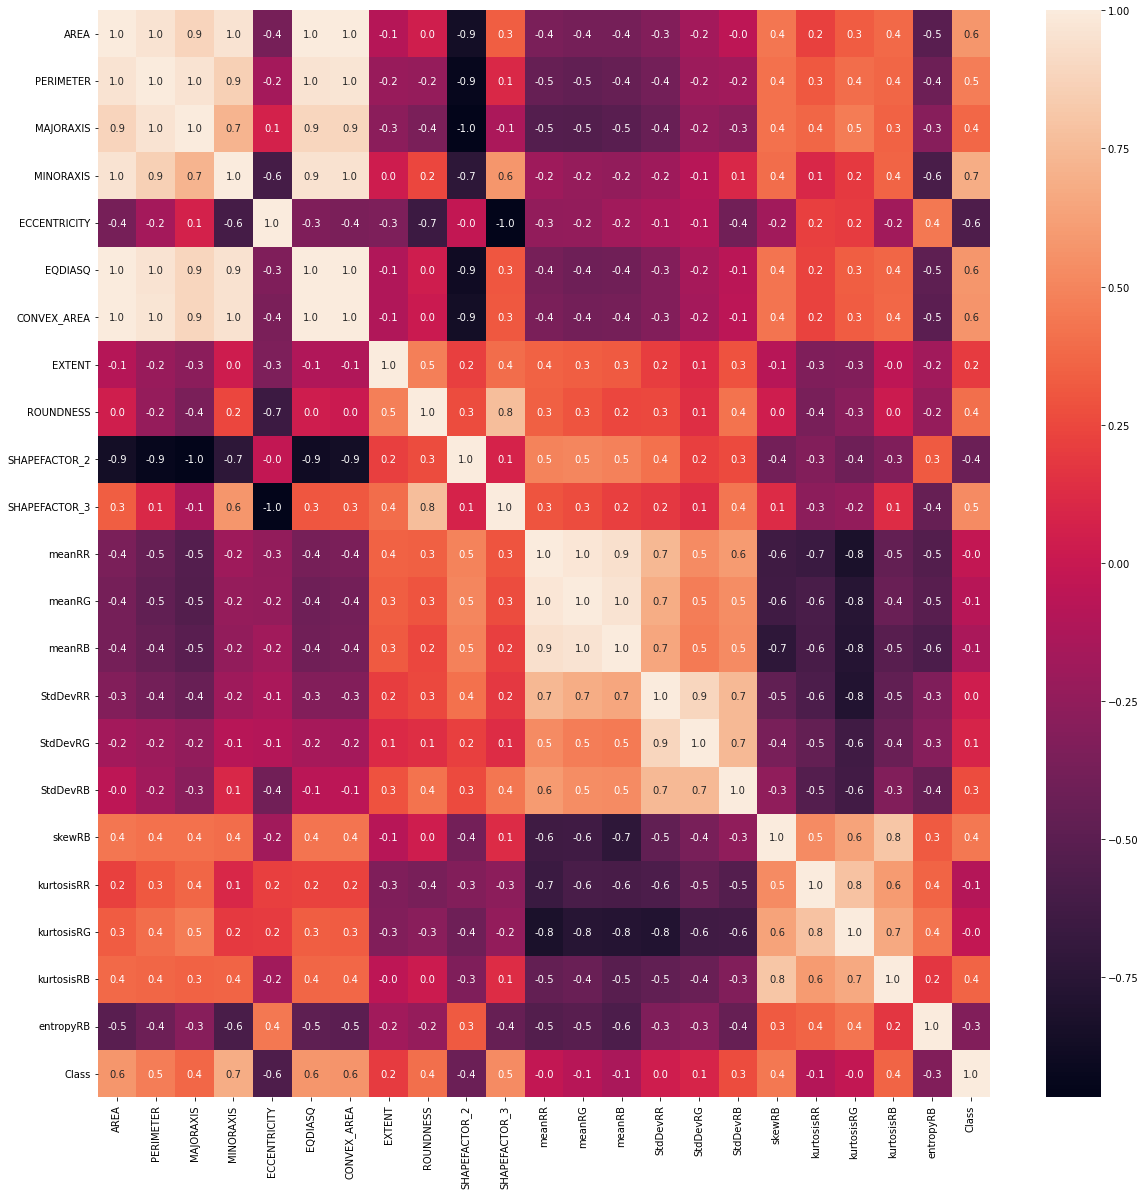

In [60]:
mpl.figure(figsize=(20, 20))
sb.heatmap(df.corr(), annot=True, fmt='.1f')

In [61]:
df.columns

Index(['AREA', 'PERIMETER', 'MAJORAXIS', 'MINORAXIS', 'ECCENTRICITY',
       'EQDIASQ', 'CONVEX_AREA', 'EXTENT', 'ROUNDNESS', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'meanRR', 'meanRG', 'meanRB', 'StdDevRR', 'StdDevRG',
       'StdDevRB', 'skewRB', 'kurtosisRR', 'kurtosisRG', 'kurtosisRB',
       'entropyRB', 'Class'],
      dtype='object')

Удалим 'meanRR', 'meanRG' и оставим 'meanRB', так как они линейно зависимы

In [62]:
df.drop(columns=['meanRR', 'meanRG'], inplace=True)

Удалим 'StdDevRR', 'StdDevRG' и оставим 'StdDevRB', так как они линейно зависимы

In [63]:
df.drop(columns=['StdDevRR', 'StdDevRG'], inplace=True)


<AxesSubplot:>

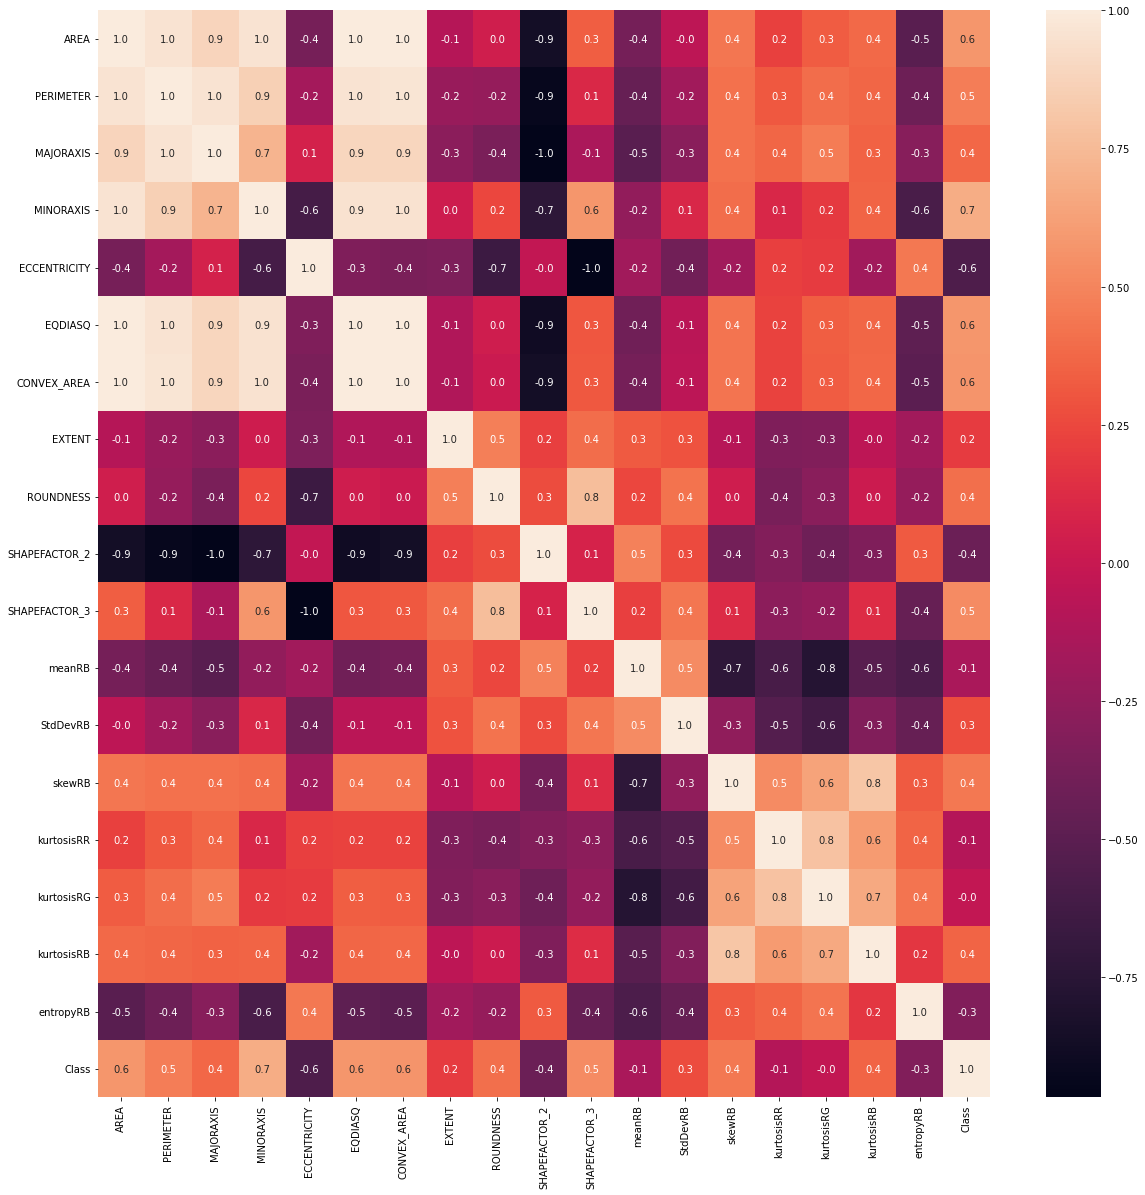

In [64]:
mpl.figure(figsize=(20, 20))
sb.heatmap(df.corr(), annot=True, fmt='.1f')

In [65]:
df.columns

Index(['AREA', 'PERIMETER', 'MAJORAXIS', 'MINORAXIS', 'ECCENTRICITY',
       'EQDIASQ', 'CONVEX_AREA', 'EXTENT', 'ROUNDNESS', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'meanRB', 'StdDevRB', 'skewRB', 'kurtosisRR',
       'kurtosisRG', 'kurtosisRB', 'entropyRB', 'Class'],
      dtype='object')

Удалим 'AREA', 'PERIMETER' так как они имеют прямую зависимость с осями

In [66]:
df.drop(columns=['AREA', 'PERIMETER'], inplace=True)


<AxesSubplot:>

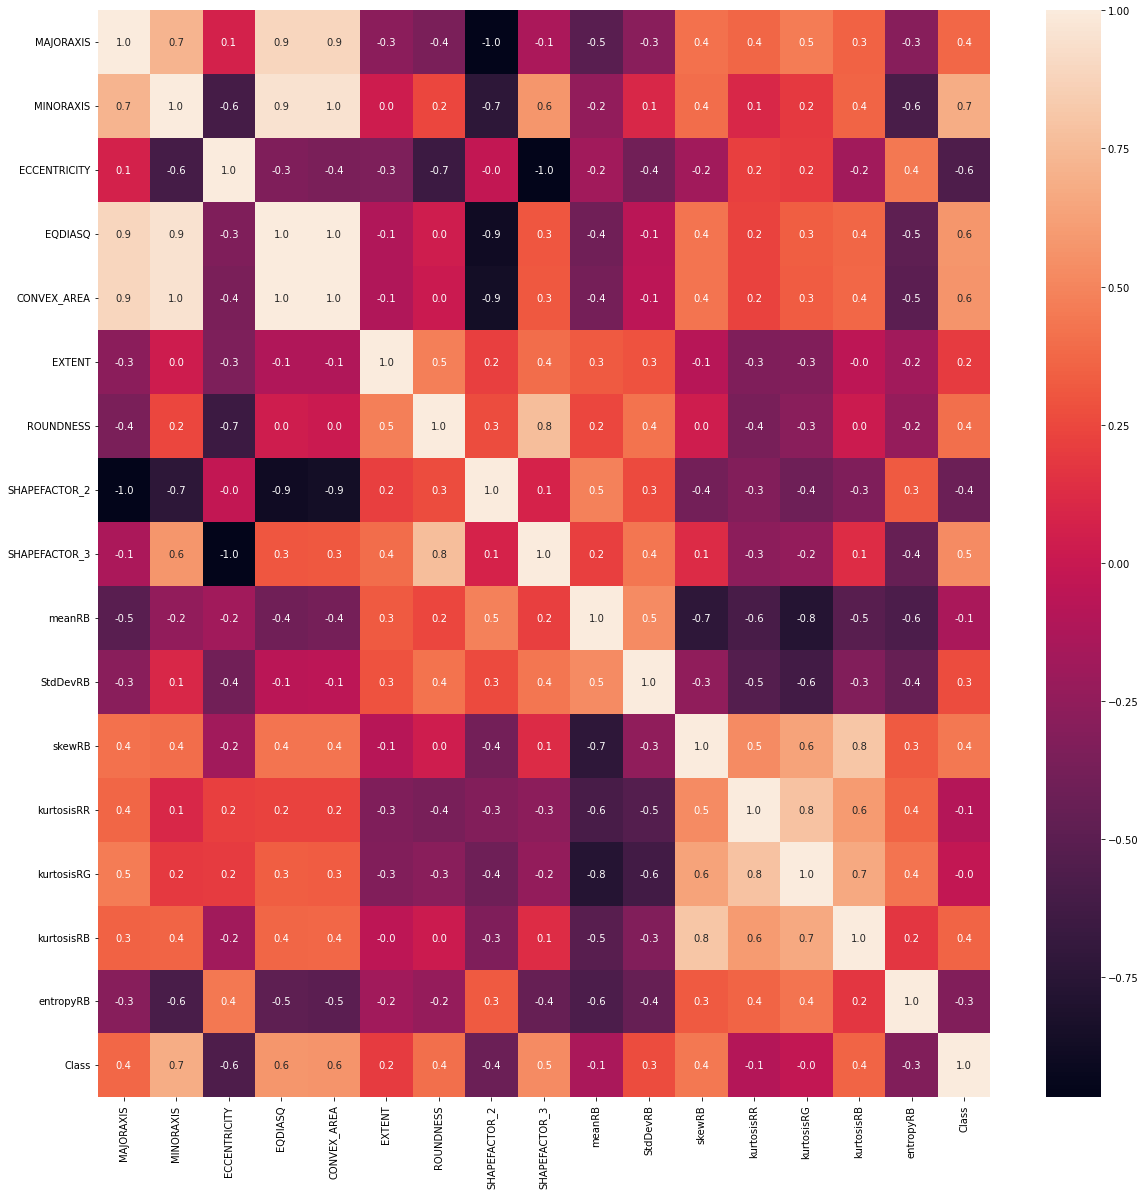

In [67]:
mpl.figure(figsize=(20, 20))
sb.heatmap(df.corr(), annot=True, fmt='.1f')

Удалим 'CONVEX_AREA', 'ROUNDNESS' так как они имеют прямую зависимость с осями

In [68]:
df.drop(columns=['CONVEX_AREA', 'ROUNDNESS'], inplace=True)


<AxesSubplot:>

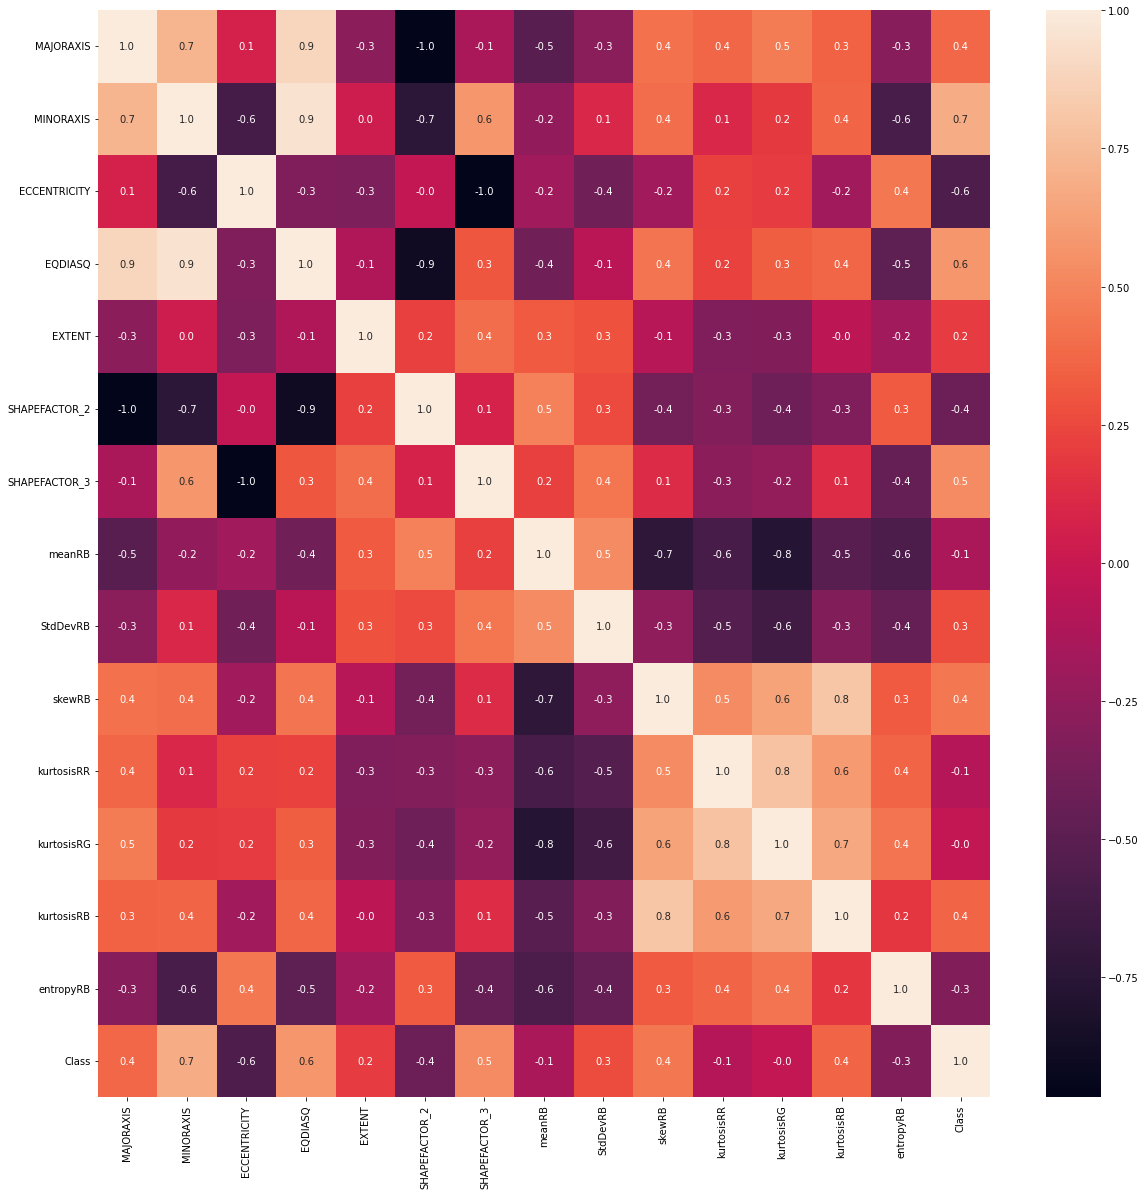

In [69]:
mpl.figure(figsize=(20, 20))
sb.heatmap(df.corr(), annot=True, fmt='.1f')

In [70]:
df.columns

Index(['MAJORAXIS', 'MINORAXIS', 'ECCENTRICITY', 'EQDIASQ', 'EXTENT',
       'SHAPEFACTOR_2', 'SHAPEFACTOR_3', 'meanRB', 'StdDevRB', 'skewRB',
       'kurtosisRR', 'kurtosisRG', 'kurtosisRB', 'entropyRB', 'Class'],
      dtype='object')

Теперь удалим все колонки, которые имеют зависимость от целевой переменной(меньше 0,4 по модулю)

In [71]:
df.drop(columns=['kurtosisRR',
       'kurtosisRG', 'entropyRB', 'meanRB', 'StdDevRB',  'EXTENT', 'SHAPEFACTOR_2'], inplace=True)

<AxesSubplot:>

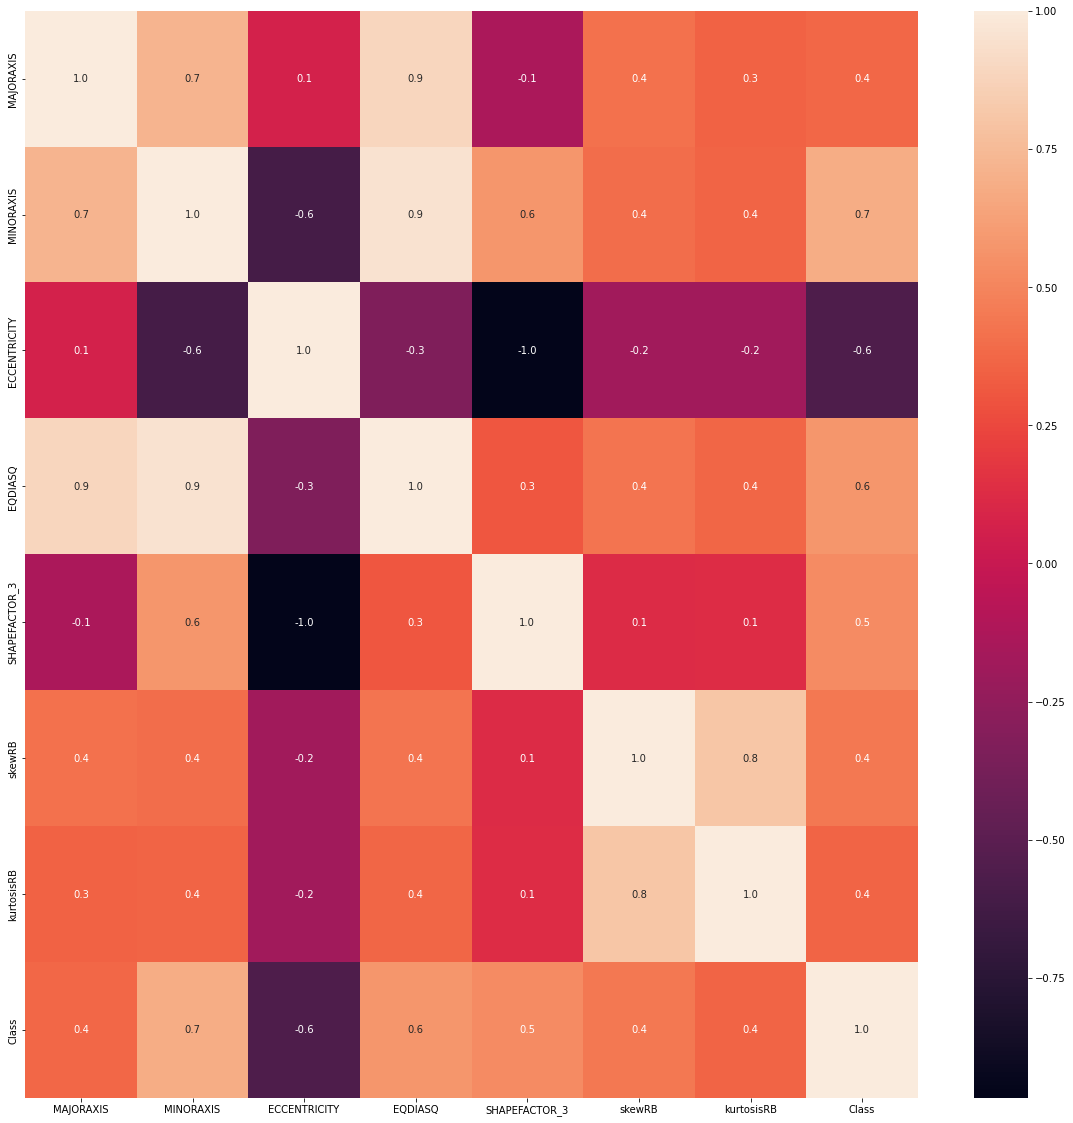

In [72]:
mpl.figure(figsize=(20, 20))
sb.heatmap(df.corr(), annot=True, fmt='.1f')

## Подготовка данных

In [73]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

<AxesSubplot:>

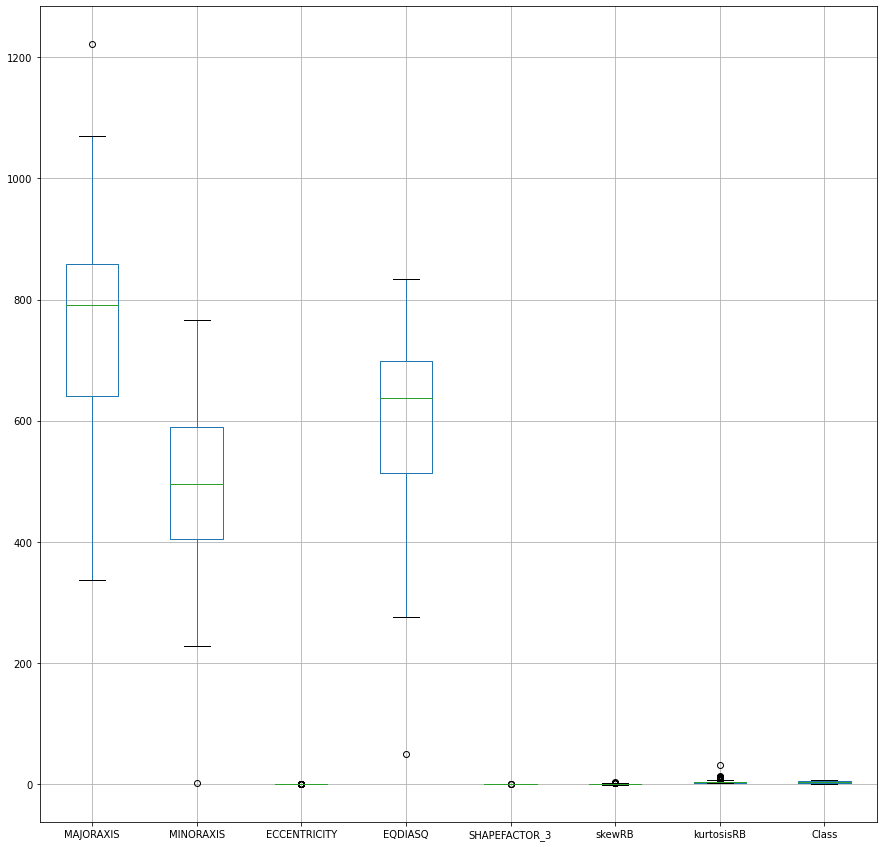

In [74]:
df.boxplot(figsize=(15, 15))

Можно увидеть, что колонки имеют большие различия между друг другом по значению, на всякий случай избавимся от этого отмасштабировав значения  

In [75]:
scal = StandardScaler()
df_scal = scal.fit_transform(df.drop('Class', axis=1))

In [76]:
df.Class.value_counts()

1    204
2    199
3    166
4     98
5     94
6     72
7     65
Name: Class, dtype: int64

([<matplotlib.patches.Wedge at 0x219942f8d30>,
 [Text(0.8315535807862787, 0.7200823857597949, 'DOKOL'),
  Text(-0.5775348935008855, 0.936190924325226, 'SAFAVI'),
  Text(-1.063343899729274, -0.2816021145313722, 'ROTANA'),
  Text(-0.41650357787515335, -1.0180986050561096, 'DEGLET'),
  Text(0.3075553449796552, -1.0561295894796459, 'SOGAY'),
  Text(0.8365715063236916, -0.7142465364335412, 'IRAQI'),
  Text(1.0716818907432084, -0.24798775182065322, 'BERHI')],
 [Text(0.4535746804288793, 0.3927722104144335, '22.7%'),
  Text(-0.3150190328186648, 0.5106495950864869, '22.2%'),
  Text(-0.5800057634886948, -0.15360115338074845, '18.5%'),
  Text(-0.22718376975008361, -0.555326511848787, '10.9%'),
  Text(0.16775746089799373, -0.5760706851707159, '10.5%'),
  Text(0.45631173072201353, -0.3895890198728406, '8.0%'),
  Text(0.5845537585872046, -0.13526604644762902, '7.2%')])

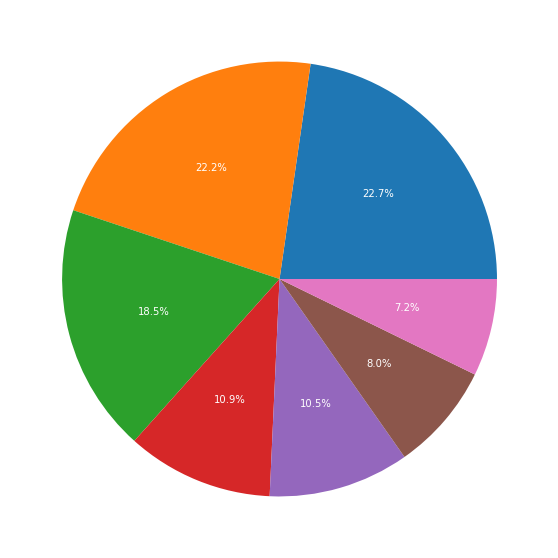

In [77]:
mpl.figure(figsize=(10,10))
mpl.pie(df.Class.value_counts(), labels=class_dic.keys(), autopct='%1.1f%%', textprops={'color':"w"})

На диаграмме выше можно увидеть, что целевой класс распределен неравномерно

По этому будет использовано сбалансированное разбиение

In [78]:
x = df_scal.copy()
y = df.Class

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.5, random_state=1, stratify=y)


Процент тестовой выборки будет меняться, чтобы подобрать оптимальное значение

## Обучение модели

In [80]:

from sklearn.metrics import accuracy_score, classification_report

### Случайный лес

In [81]:
from sklearn.ensemble import RandomForestClassifier

В предыдущих задачах случайный лес показывал себя лучше всего

In [82]:
random_forest = RandomForestClassifier(random_state=1)

In [83]:
random_forest.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [84]:
y_forest_predicted = random_forest.predict(x_test)

In [85]:
forest_accuracy = accuracy_score(y_test, y_forest_predicted)
forest_accuracy

0.8040089086859689

In [86]:
print(classification_report(y_test, y_forest_predicted))

              precision    recall  f1-score   support

           1       0.91      0.94      0.93       102
           2       0.87      0.93      0.90        99
           3       0.91      0.95      0.93        83
           4       0.67      0.61      0.64        49
           5       0.69      0.53      0.60        47
           6       0.57      0.67      0.62        36
           7       0.54      0.45      0.49        33

    accuracy                           0.80       449
   macro avg       0.74      0.73      0.73       449
weighted avg       0.80      0.80      0.80       449



Точность в 80% является довольно хорошей, и я думаю, что можно получить более значение, если по-экспериментировать с гипер параметрами

Попробуем гипер параметры

In [87]:
random_forest = RandomForestClassifier(random_state=1)
params = {
    "n_estimators": np.arange(80, 500, 10)
}
grid = GridSearchCV(random_forest, params, cv=5, n_jobs=-1)

In [88]:
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'n_estimators': array([ 80,  90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200,
       210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330,
       340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460,
       470, 480, 490])})

In [89]:
random_forest = grid.best_estimator_
print(grid.best_params_)

{'n_estimators': 280}


In [90]:
y_forest_predicted_hyper = random_forest.predict(x_test)
forest_accuracy_hyper = accuracy_score(y_test, y_forest_predicted_hyper)
forest_accuracy_hyper

0.799554565701559

In [91]:
print(classification_report(y_test, y_forest_predicted_hyper))

              precision    recall  f1-score   support

           1       0.91      0.95      0.93       102
           2       0.87      0.93      0.90        99
           3       0.91      0.95      0.93        83
           4       0.64      0.55      0.59        49
           5       0.63      0.51      0.56        47
           6       0.58      0.69      0.63        36
           7       0.58      0.45      0.51        33

    accuracy                           0.80       449
   macro avg       0.73      0.72      0.72       449
weighted avg       0.79      0.80      0.79       449



Использование гипер параметров не оказало никакого положительного эффекта

Попробую поменять процент тестовой выборки

### Метод ближайших соседей

Так как лес показал себя не очень хорошо, то может соседи покажут себя лучше

In [92]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:
k_neighbors = KNeighborsClassifier(n_neighbors=12)
k_neighbors.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [94]:
k_neighbors_predicted = k_neighbors.predict(x_test)
k_neighbors_accuracy = accuracy_score(y_test, k_neighbors_predicted)
k_neighbors_accuracy

0.8129175946547884

In [95]:
print(classification_report(y_test, k_neighbors_predicted))

              precision    recall  f1-score   support

           1       0.92      0.94      0.93       102
           2       0.84      0.95      0.89        99
           3       0.89      0.98      0.93        83
           4       0.69      0.67      0.68        49
           5       0.79      0.47      0.59        47
           6       0.59      0.75      0.66        36
           7       0.60      0.36      0.45        33

    accuracy                           0.81       449
   macro avg       0.76      0.73      0.73       449
weighted avg       0.81      0.81      0.80       449



Точность оказалась примерно равная лесу, но остается надежда, что гиперпараметры помогут увеличить точность

In [96]:
k_neighbors = KNeighborsClassifier(n_neighbors=12)
params = {
    "n_neighbors": np.arange(5, 30, 1)
}
grid = GridSearchCV(k_neighbors, params, cv=5, n_jobs=-1)

In [97]:
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=12), n_jobs=-1,
             param_grid={'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29])})

In [98]:
k_neighbors = grid.best_estimator_
print(grid.best_params_)

{'n_neighbors': 16}


In [99]:
y_k_neighbors_predicted_hyper = k_neighbors.predict(x_test)
k_neighbors_accuracy_hyper = accuracy_score(y_test, y_k_neighbors_predicted_hyper)
k_neighbors_accuracy_hyper

0.8084632516703786

In [100]:
print(classification_report(y_test, y_k_neighbors_predicted_hyper))

              precision    recall  f1-score   support

           1       0.93      0.95      0.94       102
           2       0.84      0.94      0.89        99
           3       0.87      0.98      0.92        83
           4       0.70      0.65      0.67        49
           5       0.68      0.45      0.54        47
           6       0.59      0.72      0.65        36
           7       0.65      0.39      0.49        33

    accuracy                           0.81       449
   macro avg       0.75      0.73      0.73       449
weighted avg       0.80      0.81      0.80       449



Даже с гиперпараметрами показатели оказались примерно равны показателям леса

### Метод опорных векторов

Раз метод соседей показал себя неплохо, то можно попробовать и метод опорных векторов

In [101]:
from sklearn.svm import SVC

In [102]:
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [103]:
y_svc_predicted = svc.predict(x_test)
svc_accuracy = accuracy_score(y_test, y_svc_predicted)
svc_accuracy

0.8151447661469933

In [104]:
print(classification_report(y_test, y_svc_predicted))

              precision    recall  f1-score   support

           1       0.94      0.93      0.94       102
           2       0.87      0.93      0.90        99
           3       0.93      0.94      0.93        83
           4       0.71      0.65      0.68        49
           5       0.67      0.64      0.65        47
           6       0.57      0.75      0.65        36
           7       0.57      0.36      0.44        33

    accuracy                           0.82       449
   macro avg       0.75      0.74      0.74       449
weighted avg       0.81      0.82      0.81       449



Метод векторов показал себя немного лучше всех

Попробую проверить гиперпараметры, может удасться увеличить точность

In [105]:
svc = SVC()
params = {
    "C": np.arange(1, 5, 0.1),
    "kernel": ['linear', 'poly', 'rbf', 'sigmoid']
}
grid = GridSearchCV(svc, params,  cv=5, n_jobs=-1)

In [106]:
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9]),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [107]:
svc = grid.best_estimator_
grid.best_params_

{'C': 1.2000000000000002, 'kernel': 'linear'}

In [108]:
y_svc_predicted_hyper = svc.predict(x_test)
svc_accuracy_hyper = accuracy_score(y_test, y_svc_predicted_hyper)
svc_accuracy_hyper

0.821826280623608

In [109]:
print(classification_report(y_test, y_svc_predicted_hyper))

              precision    recall  f1-score   support

           1       0.92      0.95      0.93       102
           2       0.88      0.93      0.90        99
           3       0.93      0.93      0.93        83
           4       0.74      0.65      0.70        49
           5       0.70      0.68      0.69        47
           6       0.60      0.67      0.63        36
           7       0.58      0.45      0.51        33

    accuracy                           0.82       449
   macro avg       0.76      0.75      0.76       449
weighted avg       0.82      0.82      0.82       449



На удивление с ядром linear модель показала себя лучше всего

Тогда я попробую другую линейную модель

### Линейный анализ

Попробую эту модель, так как линейный алгоритм прошлой показал себя очень хорошо, возможно и анализ покажет себя отлично

In [110]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [111]:
linear = LinearDiscriminantAnalysis()
linear.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [112]:
y_linear_predicted = linear.predict(x_test)
linear_accuracy = accuracy_score(y_test, y_linear_predicted)
linear_accuracy

0.7861915367483296

In [113]:
print(classification_report(y_test, y_linear_predicted))

              precision    recall  f1-score   support

           1       0.92      0.95      0.93       102
           2       0.90      0.84      0.87        99
           3       0.86      0.94      0.90        83
           4       0.70      0.63      0.67        49
           5       0.57      0.62      0.59        47
           6       0.58      0.53      0.55        36
           7       0.50      0.48      0.49        33

    accuracy                           0.79       449
   macro avg       0.72      0.71      0.71       449
weighted avg       0.78      0.79      0.78       449



Модель показала себя хуже. чем вектора, возможно гиперпараметры изменят ситуациию

In [114]:
linear = LinearDiscriminantAnalysis()
params = {
    "solver": ['svd', 'lsqr', 'eigen'],
    "shrinkage": np.arange(0, 1, 0.1)
}
grid = GridSearchCV(linear, params, cv=45, n_jobs= -1)


In [115]:
grid.fit(x_train, y_train)

c:\Users\VPR\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 32 members, which is less than n_splits=45.
  warnings.warn(("The least populated class in y has only %d"
c:\Users\VPR\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.8145679  0.8145679         nan 0.82814815 0.82814815
        nan 0.83259259 0.83259259        nan 0.83037037 0.83037037
        nan 0.83259259 0.83259259        nan 0.83037037 0.83037037
        nan 0.82814815 0.82814815        nan 0.82814815 0.82814815
        nan 0.82592593 0.82592593        nan 0.82592593 0.82592593]
  warnings.warn(


GridSearchCV(cv=45, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'shrinkage': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'solver': ['svd', 'lsqr', 'eigen']})

In [116]:
linear = grid.best_estimator_

In [117]:
y_linear_predicted_hyper = linear.predict(x_test)
linear_accuracy_hyper = accuracy_score(y_test, y_linear_predicted_hyper)
linear_accuracy_hyper


0.7884187082405345

In [118]:
print(classification_report(y_test, y_linear_predicted_hyper))

              precision    recall  f1-score   support

           1       0.92      0.95      0.93       102
           2       0.88      0.89      0.88        99
           3       0.89      0.94      0.91        83
           4       0.70      0.63      0.67        49
           5       0.62      0.60      0.61        47
           6       0.53      0.53      0.53        36
           7       0.43      0.39      0.41        33

    accuracy                           0.79       449
   macro avg       0.71      0.70      0.71       449
weighted avg       0.78      0.79      0.78       449



Результат никак не изменился, гиперпараметры не помогли

## Итог

<AxesSubplot:>

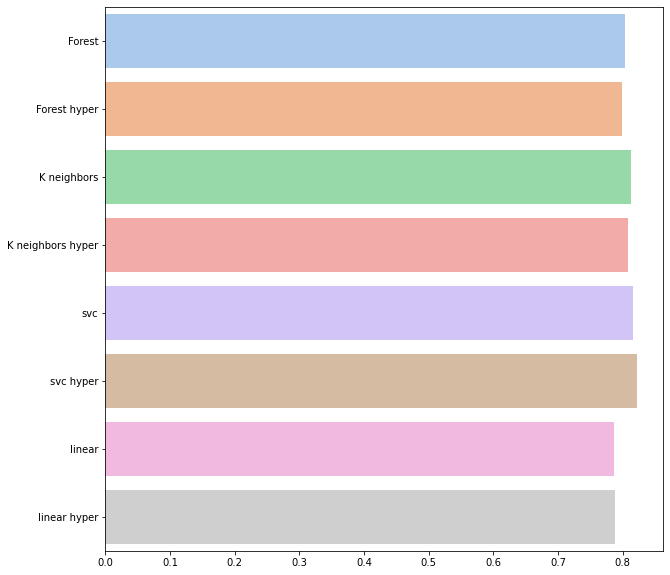

In [119]:
mpl.figure(figsize=(10, 10))
sb.barplot(y=['Forest', 'Forest hyper', 'K neighbors', 'K neighbors hyper', 'svc', 'svc hyper', 'linear', 'linear hyper'], x=[forest_accuracy, forest_accuracy_hyper, k_neighbors_accuracy, k_neighbors_accuracy_hyper,
           svc_accuracy, svc_accuracy_hyper, linear_accuracy, linear_accuracy_hyper], palette='pastel')


Можно увидеть, что модель скалярных векторов с настроенными гипер параметрами показала себя лучше всех, по этому следует использовать ее с параметром kernel=linear и C=1.2

## Сохранение модели

In [120]:
import joblib as jl

In [121]:
jl.dump(svc, './models/svc_hyper_fruits.pkl')

['./models/svc_hyper_fruits.pkl']